# Informações da tabela

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/lsvieira2/Documents/data_analyst/Online Sales Data.csv')
df.info()

# Visão geral do dataset


In [ ]:
df.head()

# Verificando se há algum valor nulo no dataset 

In [ ]:
df.isna().sum()

# Analisando os dados de forma geral


In [ ]:
df.describe()

## 1. Categorias de produtos 
- Quais categorias de produtos têm o maior número de unidades vendidas?

In [ ]:
categoria_unit = df.groupby('Product Category')['Units Sold'].sum()
categoria_unit_asc = categoria_unit.sort_values(ascending=False)
categoria_unit_df = categoria_unit_asc.reset_index()
categoria_unit_df.columns = ['Categoria dos produtos', 'Unidades vendidas por categoria']
categoria_unit_df.head(6)

In [ ]:
plt.figure(figsize=(8, 4))  
plt.bar(categoria_unit_df['Categoria dos produtos'], categoria_unit_df['Unidades vendidas por categoria'], color='skyblue')  
plt.xlabel('Categoria do produto')  
plt.ylabel('Total de vendas')  
plt.title('Total de Vendas por Categoria de Produto')  
plt.xticks(rotation=45, ha='right')  
plt.show()  

## 1.1 Categorias de produtos 

- Qual é a receita total gerada por cada categoria de produto?


In [ ]:
categoria_preco = df.groupby('Product Category')['Total Revenue'].sum()
categoria_preco_asc = categoria_preco.sort_values(ascending=False)
categoria_df = categoria_preco_asc.reset_index()
categoria_df.columns = ['Categoria dos produtos', 'Total de vendas']
categoria_df.head(6)

In [ ]:
plt.figure(figsize=(8, 4))  
plt.bar(categoria_df['Categoria dos produtos'], categoria_df['Total de vendas'], color='skyblue')  
plt.xlabel('Categoria do produto')  
plt.ylabel('Total de vendas')  
plt.title('Total de Vendas por Categoria de Produto')  
plt.xticks(rotation=45, ha='right')  
plt.show()  

## 2. Quais são os produtos mais populares?
- Qual é a receita total gerada por cada produto?

In [ ]:
produto_preco = df.groupby('Product Name')['Total Revenue'].sum()
produto_preco_asc = produto_preco.sort_values(ascending=False)
produto_df = produto_preco_asc.reset_index()
produto_df.columns = ['Nome do produto', 'Total de vendas']
produto_10 = produto_df.head(10)
produto_10


In [ ]:
plt.figure(figsize=(8, 4))  
plt.bar(produto_10['Nome do produto'], produto_10['Total de vendas'], color='skyblue')  
plt.xlabel('Categoria do produto')  
plt.ylabel('Total de vendas')  
plt.title('Total de Vendas por produto')  
plt.xticks(rotation=45, ha='right')  
plt.show()  

## 2.1 Quais são os produtos mais populares?
- Quais produtos específicos têm o maior número de unidades vendidas?

In [ ]:
produto_unit = df.groupby('Product Name')['Units Sold'].sum()
produto_unit_asc = produto_unit.sort_values(ascending=False)
produto_unit_df = produto_unit_asc.reset_index()
produto_unit_df.columns = ['Nome do produto', 'Unidades vendidas']
produto_unit_10 = produto_unit_df.head(10)
produto_unit_10

In [ ]:
plt.figure(figsize=(8, 4))  
plt.bar(produto_unit_10['Nome do produto'], produto_unit_10['Unidades vendidas'], color='skyblue')  
plt.xlabel('Nome do produto')  
plt.ylabel('Unidades vendidas')  
plt.title('Total de Vendas por produto')  
plt.xticks(rotation=45, ha='right')  
plt.show()  

## Análise por Região
3. **Quais regiões geram mais receita?**
   - Qual é a distribuição das vendas por região?
   - Há alguma região com desempenho notavelmente melhor ou pior?

In [ ]:
regiao_vendas = df.groupby('Region')['Total Revenue'].sum()
regiao_vendas_asc = regiao_vendas.sort_values(ascending=False)
regiao_df = regiao_vendas_asc.reset_index()
regiao_df.columns = ['Regiao', 'Total de vendas']
regiao_df.head()

In [ ]:
plt.figure(figsize=(8, 4))  
plt.bar(regiao_df['Regiao'], regiao_df['Total de vendas'], color='skyblue')  
plt.xlabel('Categoria do produto')  
plt.ylabel('Total de vendas')  
plt.title('Total de Vendas por Regiao')  
plt.xticks(rotation=45, ha='right')  
plt.show()  

3.1 **Quais regiões geram mais receita?**
   - Há alguma região com desempenho notavelmente melhor ou pior?

In [ ]:
melhor_regiao = regiao_df.loc[regiao_df['Total de vendas'].idxmax()]
pior_regiao = regiao_df.loc[regiao_df['Total de vendas'].idxmin()]
desempenho_extremos = pd.concat([melhor_regiao.to_frame().T, pior_regiao.to_frame().T], ignore_index=True)
desempenho_extremos

## Tendências de Vendas ao Longo do Tempo
4. **Como as vendas variam ao longo do tempo (diariamente, semanalmente, mensalmente)?**
   - Há picos de vendas em determinadas datas ou períodos?

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
vendas_diarias = df.groupby(df['Date'].dt.date)['Total Revenue'].sum()
vendas_diarias

In [59]:
vendas_semanais = df.groupby(df['Date'].dt.to_period('W'))['Total Revenue'].sum()
vendas_semanais

Date
2024-01-01/2024-01-07    5513.83
2024-01-08/2024-01-14    4211.83
2024-01-15/2024-01-21    2767.84
2024-01-22/2024-01-28    1064.87
2024-01-29/2024-02-04    1569.81
2024-02-05/2024-02-11    5374.86
2024-02-12/2024-02-18    2361.86
2024-02-19/2024-02-25    1857.84
2024-02-26/2024-03-03    2028.80
2024-03-04/2024-03-10    2899.84
2024-03-11/2024-03-17    3309.86
2024-03-18/2024-03-24    1678.83
2024-03-25/2024-03-31    3560.86
2024-04-01/2024-04-07    2862.87
2024-04-08/2024-04-14    5167.84
2024-04-15/2024-04-21    1168.36
2024-04-22/2024-04-28    1802.65
2024-04-29/2024-05-05    1879.87
2024-05-06/2024-05-12    3107.74
2024-05-13/2024-05-19    2176.59
2024-05-20/2024-05-26    1633.34
2024-05-27/2024-06-02    1306.87
2024-06-03/2024-06-09    1918.86
2024-06-10/2024-06-16    1822.83
2024-06-17/2024-06-23    1984.38
2024-06-24/2024-06-30    1459.53
2024-07-01/2024-07-07    1832.86
2024-07-08/2024-07-14    1004.82
2024-07-15/2024-07-21    1294.89
2024-07-22/2024-07-28    1534.94
2024-

In [ ]:
vendas_mensais = df.groupby(df['Date'].dt.to_period('M'))['Total Revenue'].sum()
vendas_mensais

In [ ]:
media_diaria = vendas_diarias.mean()
media_diaria

In [ ]:
desvio_padrao_vendas_diarias = vendas_diarias.std()
desvio_padrao_vendas_diarias

In [ ]:
picos_vendas = vendas_diarias[vendas_diarias > (media_diaria + 2 * desvio_padrao_vendas_diarias)].reset_index()
picos_vendas_df = picos_vendas.sort_values(by = 'Total Revenue', ascending=False, ignore_index=True)
picos_vendas_df.head(15)

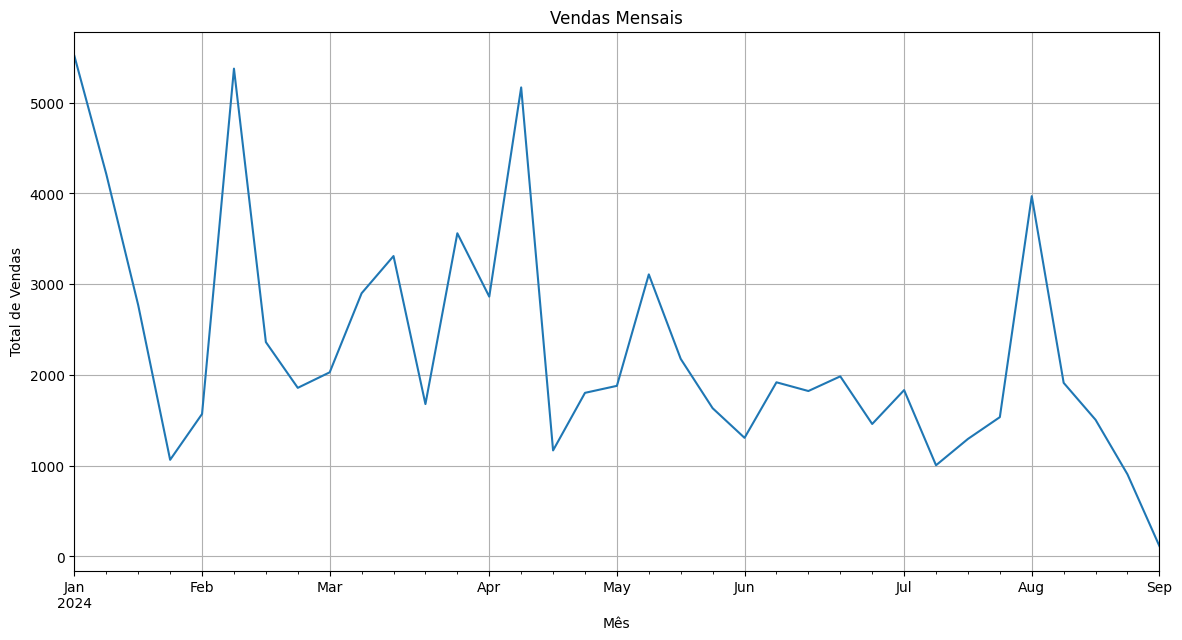

In [60]:
plt.figure(figsize=(14, 7))
vendas_semanais.plot()
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()

## Métodos de Pagamento
5. **Qual é a distribuição dos métodos de pagamento utilizados?**
   - Há algum método de pagamento que se destaca em termos de frequência ou valor total?

In [ ]:
frequencia_pagamento = df['Payment Method'].value_counts(normalize=True) * 100
frequencia_pagamento_df = frequencia_pagamento.reset_index()
frequencia_pagamento_df.columns = ['Metodo de pagamento', 'Frequencia (%)']
frequencia_pagamento_df

5.1 **Há algum método de pagamento que se destaca em termos de frequência ou valor total?**

In [ ]:
valor_total_metodos_pagamento = df.groupby('Payment Method')['Total Revenue'].sum()
valor_total_metodos_pagamento_percent = (valor_total_metodos_pagamento / valor_total_metodos_pagamento.sum()) * 100
valor_total_metodos_pagamento_df = valor_total_metodos_pagamento_percent.reset_index().sort_values(by = 'Total Revenue', ascending=False, ignore_index=True)
valor_total_metodos_pagamento_df.columns = ['Método de Pagamento', 'Valor Total (%)']

valor_total_metodos_pagamento_df.head()


## 6. Desempenho de vendas por transação:
- Qual é o valor médio de receita por transação?
- Existem transações notavelmente grandes ou pequenas que mereçam atenção?


In [ ]:
media_transacao = df['Total Revenue'].mean()
media_transacao

In [ ]:
desvio_transacao = df['Total Revenue'].std()
desvio_transacao

In [ ]:
limiar_superior =  media_transacao + 2 * desvio_transacao
limiar_inferior = media_transacao - 2 * desvio_transacao

In [ ]:
transacao_grande = df[df['Total Revenue'] > limiar_superior]
transacao_pequena = df[df['Total Revenue'] < limiar_inferior]
transacoes_extremas = pd.concat([transacao_grande])
transacoes_extremas.head(30)

## 8. Popularidade de diferentes regiões.
- Explore a popularidade de diferentes categorias de produtos em todas as regiões.


In [ ]:
df_america = df[df['Region'] == 'North America']
america_category = df_america.groupby('Product Category')['Total Revenue'].sum().reset_index()
america_asc = america_category.sort_values(by= 'Total Revenue', ascending = False)
america_asc.head()

In [ ]:
df_asia = df[df['Region'] == 'Asia']
asia_category = df_asia.groupby('Product Category')['Total Revenue'].sum().reset_index()
asia_asc = asia_category.sort_values(by= 'Total Revenue', ascending = False)
asia_asc.head()

In [ ]:
df_europe = df[df['Region'] == 'Asia']
europe_category = df_europe.groupby('Product Category')['Total Revenue'].sum().reset_index()
europe_asc = europe_category.sort_values(by= 'Total Revenue', ascending = False)
europe_asc.head()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

axes[0].bar(america_asc['Product Category'], america_asc['Total Revenue'], color='skyblue')
axes[0].set_xlabel('Nome da categoria')
axes[0].set_ylabel('Unidades vendidas')
axes[0].set_title('Total de Vendas por categoria da América do Norte')
axes[0].tick_params(axis='x', rotation=45, labelright=True)

axes[1].bar(asia_asc['Product Category'], asia_asc['Total Revenue'], color='lightgreen')
axes[1].set_xlabel('Nome da categoria')
axes[1].set_title('Total de Vendas por categoria da Ásia')
axes[1].tick_params(axis='x', rotation=45, labelright=True)

axes[2].bar(europe_asc['Product Category'], europe_asc['Total Revenue'], color='salmon')
axes[2].set_xlabel('Nome da categoria')
axes[2].set_title('Total de Vendas por categoria da Europa')
axes[2].tick_params(axis='x', rotation=45, labelright=True)

plt.tight_layout()
plt.show()

In [67]:
df_american = df[df['Region'] == 'North America']
america_category_month = df_american.groupby(df['Date'].dt.to_period('W'))['Total Revenue'].sum().reset_index()
american_asc = america_category_month.sort_values(by= 'Date', ascending = False).reset_index(drop=True)
american_asc

,Date,Total Revenue
0,2024-08-19/2024-08-25,351.95
1,2024-08-12/2024-08-18,249.97
2,2024-08-05/2024-08-11,225.94
3,2024-07-29/2024-08-04,3181.96
4,2024-07-22/2024-07-28,350.96
5,2024-07-15/2024-07-21,387.98
6,2024-07-08/2024-07-14,256.94
7,2024-07-01/2024-07-07,424.98
8,2024-06-24/2024-06-30,685.96
9,2024-06-17/2024-06-23,869.94


<Figure size 1400x700 with 0 Axes>

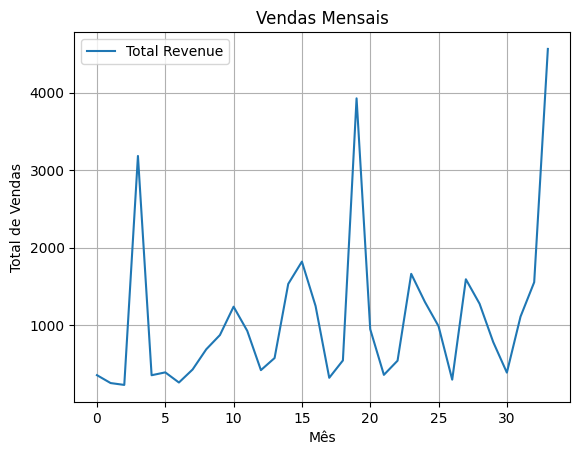

In [63]:
plt.figure(figsize=(14, 7))
american_asc.plot()
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()